<a href="https://colab.research.google.com/github/dewnijayasuriya/DL-LAB02/blob/main/Question03-MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [3]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

What happens overall?

*  The code randomly selects 10 handwritten digit images from the training set.

*  It prints their labels.

*  Then it displays them in a 2×5 grid, each subplot showing one digit.


Target labels:  [0 2 6 9 5 7 3 9 3 5]


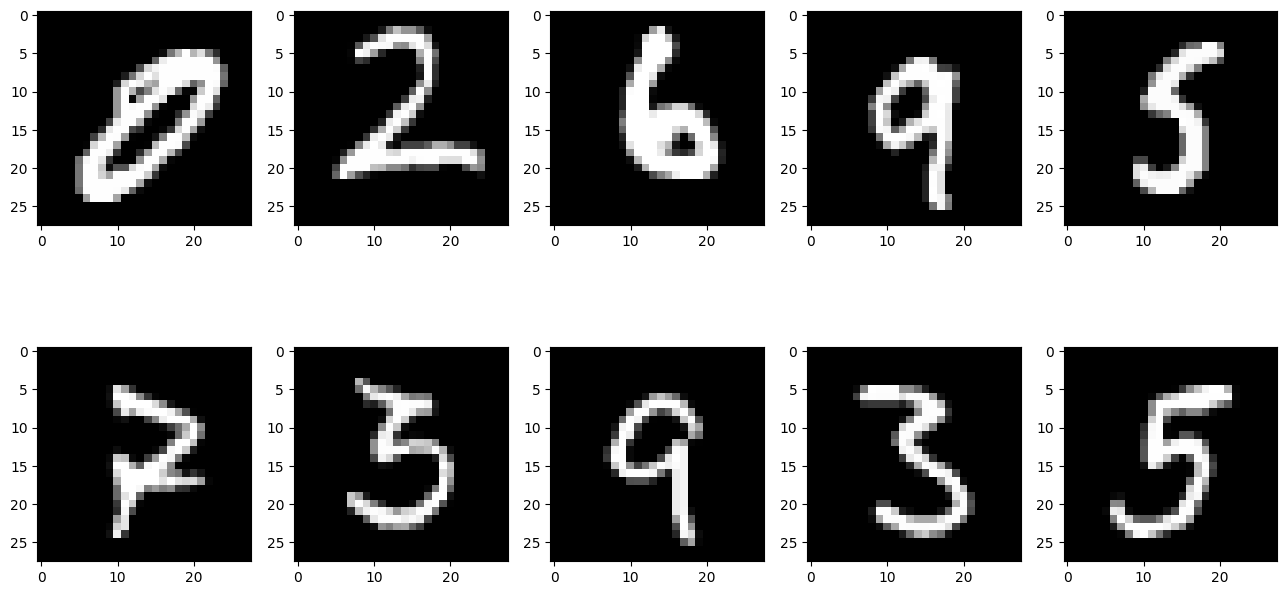

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(16,8)) # Creates a grid of subplots → 2 rows, 5 columns (so 10 plots). axs is a 2D array of axes (subplots).
random_numbers = np.random.randint(0, 60000, 10) # Picks 10 random integers between 0 and 60000 (because there are 60,000 training samples).
print('Target labels: ',train_target[random_numbers]) # Prints the actual labels (the correct digit) for those 10 random images.
for idx, ax in enumerate(axs.ravel()): # axs.ravel() flattens the 2×5 grid of subplots into a 1D list of 10 axes.
    ax.imshow(train_data[random_numbers[idx]],cmap='gray') # Displays the image at the random index in grayscale (cmap='gray').Each subplot shows one of the handwritten digits.
plt.show()

Pre-processing stage

In [5]:
new_train_data = train_data/255.0 # MNIST images have pixel values 0–255.Dividing by 255 normalizes the values to 0–1.
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target) # converts each integer to a one-hot vector:
new_test_target = to_categorical(test_target)

Create the Model architecture

In [14]:
model=Sequential() # stack of layers, one after the other.

model.add(Flatten(input_shape=(28,28))) #Input is an image of shape 28×28 and flatten converts it to a 1D vector like (784)

model.add(Dense(128,activation='relu')) # A Dense layer = fully connected layer. 64 neurons and input size is automatically 784 from flatten
model.add(Dense(64,input_dim=64,activation='relu')) # each neuron connects to the 64 outputs from the previous layer.
model.add(Dense(32,input_dim=64,activation='relu')) # This layer reduces the dimensionality from 64 → 32.
model.add(Dense(10,input_dim=32,activation='softmax')) # Activation = Softmax → outputs probabilities that sum to 1.
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #compile the model. adam (efficient optimization algorithm).

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [17]:
train_info = model.fit(new_train_data , new_train_target , epochs = 15) # new_train_data → 60,000 images (scaled to 0–1), new_train_target → one-hot encoded labels.
# epochs=10 → the model goes through the entire training dataset 10 times.

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9946 - loss: 0.0164
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9939 - loss: 0.0182
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9956 - loss: 0.0129
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9951 - loss: 0.0135
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9954 - loss: 0.0142
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9953 - loss: 0.0144
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9967 - loss: 0.0104
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9955 - loss: 0.0141
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9958 - loss: 0.0143
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9969 - loss: 0.0093
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9967 - loss: 0.0097
Epoch 12/15
1875/1875 ━━━━

Plot the loss and accuracy graphs

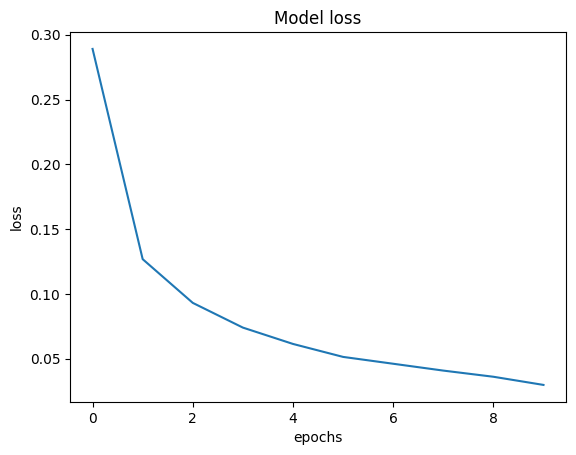

In [9]:
plt.plot(train_info.history['loss']) # Draws a line plot of loss values across epochs (x-axis = epoch number, y-axis = loss).
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

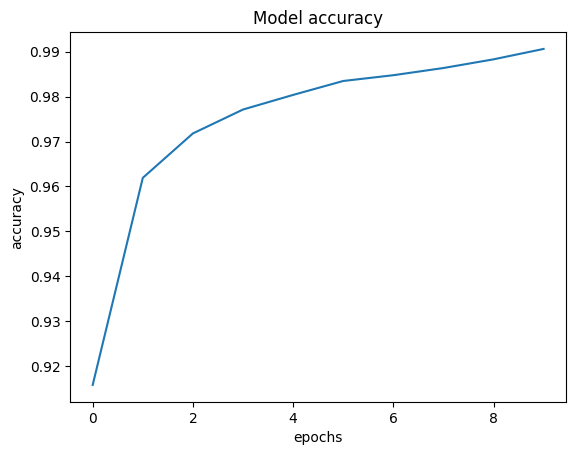

In [10]:
plt.plot(train_info.history['accuracy']) # Draws a line graph of accuracy vs. epochs.
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [11]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1202
Loss of the Test dataset is: 0.10729372501373291
Accuracy of the test dataset is: 0.9721999764442444


Save the model weights

In [20]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=MNIST_WEIGHTS_V1.h5

b) Add L1 and L2 regularization

In [18]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

# l1(λ) → adds |w| penalty to loss.
# l2(λ) → adds w² penalty to loss.

# Regularization modifies the loss function. Hleps avoid overfitting -> better generalization on test data

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001))) # adds penalty = 0.001 * Σ(w²) for all weights. Effect: discourages large weights, reducing overfitting.
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001))) # adds penalty = 0.001 * Σ(w²) for all weights. Effect: discourages large weights, reducing overfitting.
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons (digits 0–9). Softmax → converts outputs to probabilities.

model.compile(loss='categorical_crossentropy', # Compile the model
              optimizer='adam',
              metrics=['accuracy'])

train_info = model.fit(new_train_data, new_train_target, # Train the model
                       epochs=15, batch_size=64,
                       validation_data=(new_test_data, new_test_target))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8256 - loss: 1.3622 - val_accuracy: 0.9373 - val_loss: 0.6408
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9415 - loss: 0.5935 - val_accuracy: 0.9539 - val_loss: 0.4797
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9539 - loss: 0.4628 - val_accuracy: 0.9586 - val_loss: 0.3947
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9584 - loss: 0.3925 - val_accuracy: 0.9508 - val_loss: 0.3746
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9621 - loss: 0.3405 - val_accuracy: 0.9642 - val_loss: 0.3160
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9655 - loss: 0.3121 - val_accuracy: 0.9634 - val_loss: 0.3046
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9667 - loss: 0.2912 - val_accuracy: 0.9614 - val_loss: 0.2928
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9679 - loss: 0.2767 - val_accuracy: 0

c) Visualize class-wise performance(Confusion Matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


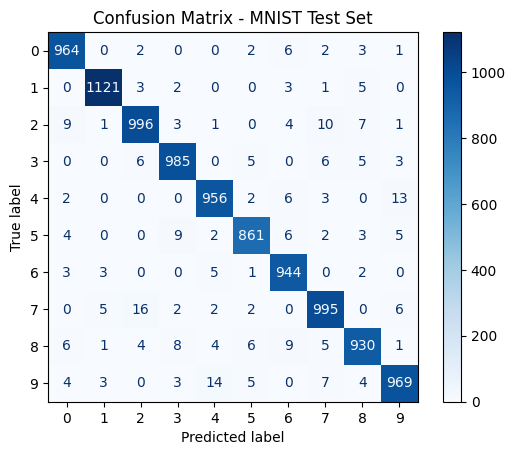

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = model.predict(new_test_data) # Model predicts probabilities for each class (0–9).
y_pred_classes = np.argmax(y_pred, axis=1) # argmax picks the index of the highest probability.
y_true = np.argmax(new_test_target, axis=1) # Convert one-hot encoded test labels back to integers.

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes) # Builds a 10×10 confusion matrix.

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues, values_format='d') # Plots the confusion matrix as a heatmap.
plt.title("Confusion Matrix - MNIST Test Set")
plt.show()